In [1]:
from pycaret.datasets import get_data
from pycaret.classification import setup,compare_models

data = get_data('telecom_customer_churn')

clf = setup(data,target='Customer Status')

best_model = compare_models()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:52:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [7]:
clf = setup(data,target='Customer Status')


,Description,Value
0,Session id,7358
1,Target,Customer Status
2,Target type,Multiclass
3,Target mapping,"Churned: 0, Joined: 1, Stayed: 2"
4,Original data shape,"(7043, 38)"
5,Transformed data shape,"(7043, 72)"
6,Transformed train set shape,"(4930, 72)"
7,Transformed test set shape,"(2113, 72)"
8,Ordinal features,14
9,Numeric features,15


In [2]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:32:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5598, verbose=0, warm_start=False)

In [5]:
#tune_model()
from pycaret.classification import tune_model
tune_model(best_model) 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:34:13
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5598, verbose=0, warm_start=False)

In [19]:
create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:41:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,0.9910,0.9615,0.9627,0.9611,0.9178,0.9190
1,0.9675,0.9936,0.9675,0.9687,0.9670,0.9305,0.9320
2,0.9594,0.9787,0.9594,0.9602,0.9588,0.9132,0.9147
3,0.9777,0.9918,0.9777,0.9789,0.9775,0.9527,0.9535
4,0.9797,0.9983,0.9797,0.9796,0.9795,0.9570,0.9573
5,0.9655,0.9884,0.9655,0.9673,0.9650,0.9268,0.9283
6,0.9858,0.9925,0.9858,0.9859,0.9857,0.9701,0.9703
7,0.9777,0.9979,0.9777,0.9789,0.9778,0.9533,0.9536
8,0.9797,0.9967,0.9797,0.9802,0.9796,0.9571,0.9576


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7838, verbose=0, warm_start=False)

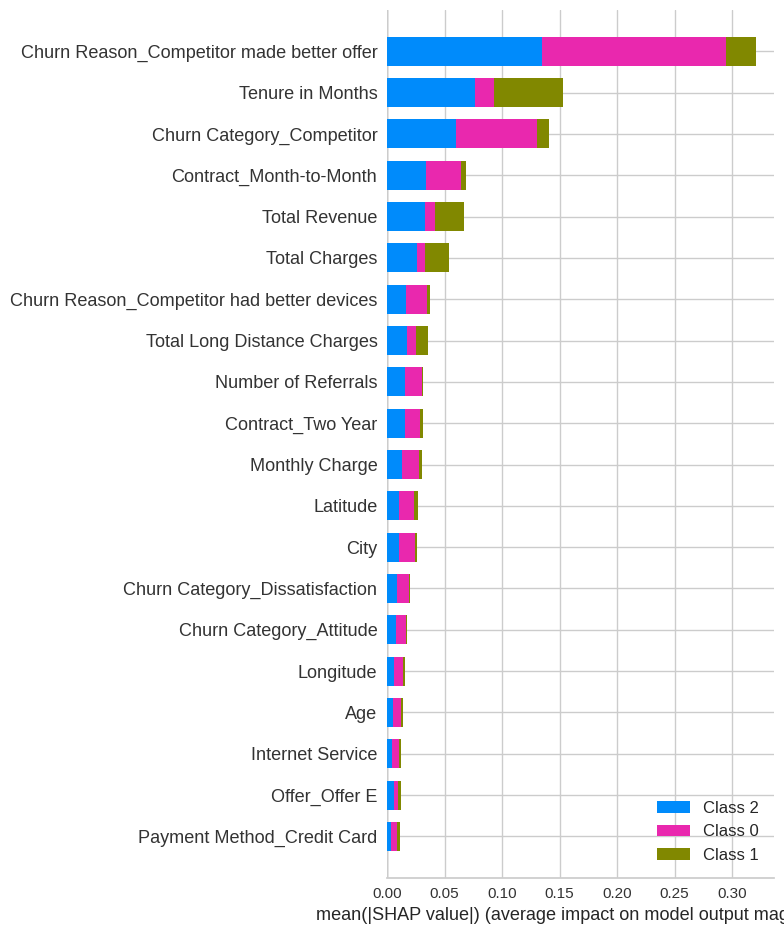

In [20]:
interpret_model(best_model)

In [ ]:
save_model(best_model,'model')

In [24]:

import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [38]:
type(model)

sklearn.ensemble._forest.RandomForestClassifier

In [27]:
from sklearn.metrics import accuracy_score
X = data.drop('Customer Status',axis=1)
y = data['Customer Status']

In [30]:
import pandas as pd
X = pd.get_dummies(X,drop_first=True)
y = pd.get_dummies(y,drop_first=True)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7838, verbose=0, warm_start=False)

In [42]:
model.score(X_test,y_test)

0.950319375443577